In [2]:
# Ariel Hasse, David Hitlin, SURF; This program creates the convolutions and areas for BaF2 and the UV full extended
# PMT second trial. The final output is the percentage of slow and fast component found from a four 
# gaussian fit. UV full extended second trial; 1460 Volts

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize 
from scipy import stats
from scipy.optimize import curve_fit
import scipy.integrate as integrate
from scipy.interpolate import interp1d
from scipy import interp            

In [3]:
def seg_lists(split):
    '''This program splits the global lists at a specified y value. It returns a tuple of
    four lists; x and y value for the first and second half of the split in data, respectively'''
    alldatax = wl1
    alldatay = intensity
    twox = []
    twoy = []
    onex = []
    oney = []
    for i in alldatay:
        if i == split:
            onex = alldatax
            oney = alldatay
            break
        else:
            twox.append(alldatax[i])
            twoy.append(alldatay[i])
            del alldatax[i]
            del alldatay[i]
    return (onex, oney, twox, twoy)
    
    

In [4]:
def BaF2_spectrum():
    '''This function plots the emission spectrum for BaF2 from manufacturer specifications. This plot is not fitted.'''
    plt.plot(wl_BaF2, intensity, label = 'Intensity of Light')
    plt.title('Emission Spectrum for BaF2')
    plt.xlabel('Wavelength in Nanometers')
    plt.ylabel('Relative Light Intensity')
    plt.legend(loc = 2)
    plt.show()
    

In [5]:
def gauss_BaF2(guess):
    '''This is a gaussian chi squared sum. The argument requires a list of
    three variables and x and y lists must be defined outside of the function
    in the program'''
    arx = np.asarray(wl_BaF2)
    ary = np.asarray(intensity)
    return sum(np.power(guess[0]*np.exp(-np.power((arx-guess[1]), 2)/(2*np.power(guess[2], 2)))\
        + guess[3]*np.exp(-np.power((arx-guess[4]), 2)/(2*np.power(guess[5], 2))) + \
        guess[6]*np.exp(-np.power((arx-guess[7]), 2)/(2*np.power(guess[8], 2))) + \
        guess[9]*np.exp(-np.power((arx-guess[10]), 2)/(2*np.power(guess[11], 2))) - ary, 2))
        

In [6]:
def optimize(f, guess):
    '''Takes a function and potential parameters and outputs the minimized 
    values for the guess'''
    constr = [(0, None), (0, None), (0, None), (0, None), (0, None), (0, None),(0, None),\
                (0, None), (0, None), (0, None), (0, None), (0, None)]
    fit = minimize(f, guess, method= 'Nelder-Mead', bounds = constr)
    return fit
 

In [38]:
def linefitgauss4(opt, x, title, xname, yname, legend):
    ''' This plots the line of best fit from the optimize function for a 
    ploynomial'''
    ans = list(opt.x)
    i = 0
    y = []
    for i in x:
        y.append(ans[0]*np.exp(-np.power((i-ans[1]), 2)/(2*np.power(ans[2], 2)))+\
            ans[3]*np.exp(-np.power((i-ans[4]), 2)/(2*np.power(ans[5], 2))) +\
            ans[6]*np.exp(-np.power((i-ans[7]), 2)/(2*np.power(ans[8], 2))) +\
            ans[9]*np.exp(-np.power((i-ans[10]), 2)/(2*np.power(ans[11], 2))))
    plt.plot(x, y)
    plt.plot(x, y, label = legend)
    plt.plot(wl_BaF2, y_final)
    plt.title(title)
    plt.xlabel(xname)
    plt.ylabel(yname)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show() 
    

In [8]:
def slow_fast(opt):
    '''This function splits the four gaussian fit into the slow and fast components
    of the BaF2 crystal and then it plots the fits'''
    opti = opt.x
    x = list(range(150, 451))
    y_fast = []
    y_slow = []
    
    for i in range(150, 451):
        y_fast.append(opti[0]*np.exp(-np.power((i-opti[1]), 2)/(2*np.power(opti[2], 2)))\
        + opti[3]*np.exp(-np.power((i-opti[4]), 2)/(2*np.power(opti[5], 2))))
        
        y_slow.append(opti[6]*np.exp(-np.power((i-opti[7]), 2)/(2*np.power(opti[8], 2)))\
        + opti[9]*np.exp(-np.power((i-opti[10]), 2)/(2*np.power(opti[11], 2))))
    
    plt.plot(x, y_fast, label = 'Fast Component')
    plt.plot(x, y_slow, label = 'Slow Component')
    plt.title('Fits for the Slow and Fast Components (BaF2)')
    plt.xlabel('Wavelength in Nanometers')
    plt.ylabel('Relative Light Intensity')
    plt.legend(loc = 2)
    plt.show()
    

In [9]:
def comp_fast(x):
    '''Returns the function of the fast component with the fitted parameters'''
    return values[0]*np.exp(-np.power((x-values[1]), 2)/(2*np.power(values[2], 2)))\
        + values[3]*np.exp(-np.power((x-values[4]), 2)/(2*np.power(values[5], 2)))
        

In [10]:
def comp_slow(x):
    '''Returns the function of the fast component with the fitted parameters'''
    return values[6]*np.exp(-np.power((x - values[7]), 2)/(2*np.power(values[8], 2)))\
        + values[9]*np.exp(-np.power((x - values[10]), 2)/(2*np.power(values[11], 2)))   
    
        

In [11]:
def comp_perc(func1, func2):
    '''This function outputs the percentage of the curve that is the fast and slow
    componetns, respectively. It takes in a function for both the slow and fast fits'''
    fast = integrate.quad(func1, 150, 450)
    slow = integrate.quad(func2, 150, 450)
    fast_perc = (fast[0])/(fast[0] + slow[0])
    slow_perc = (slow[0])/(fast[0] + slow[0])
    print (fast_perc, slow_perc)

In [12]:
def gauss_PMT(para):
    arx = np.asarray(wl_BaF2)
    ary = np.asarray(y_final)    
    return sum(np.power(para[0]*np.exp(-np.power((arx-para[1]), 2)/(2*np.power(para[2], 2)))\
        + para[3]*np.exp(-np.power((arx-para[4]), 2)/(2*np.power(para[5], 2))) + \
        para[6]*np.exp(-np.power((arx-para[7]), 2)/(2*np.power(para[8], 2))) + \
        para[9]*np.exp(-np.power((arx-para[10]), 2)/(2*np.power(para[11], 2))) - ary, 2))
       
                     
             

In [13]:
def convolve(x, y1, y2):
    '''This function takes three lists and convolves the last two. It returns the convolved y list.'''
    conv = []
    coun = 0
    for i in x:
        conv.append(y1[coun]*y2[coun])
        coun += 1
    return conv

In [14]:
def convolve_func():
    wl3 = list(range(150, 501, .1))
    quan = []
    inten = []
    conv = []
    coun = 0
    splfit = interp1d(wl2, quan_eff_rel)
    for i in wl3:
        inten.append()
    for i in wl3:
        quan.append(splfit(i))
    for i in inten:
        conv.append(i*quan[coun])
        coun += 1
        
    
   

In [15]:
# These two functions create the final QE list for this PMT set-up. This is necessary since the PMT and the filter both
# have QEs and they needed to be combined. 

def create_list(file):
    '''This function is inteded to take a single column text file and convert it to a list. The function also turns
    the list into parts of one hundred to match the other QE data.'''
    raw = []
    f = open(file, 'r')
    for line in f:
        raw.append(line)
    relative = [float(x) / outof for x in raw]
    return relative 

def final_QE():
    '''Using the lists in the previous cell this function creates the final QE for this PMT set up that is compatible
    with the BaF2 specturm lists'''
    final_QE = []
    fil = []
    pmt = []
    counter = 0
    for i in wl_BaF2:
        fil.append(interp(i, wl_filter, QE_filter))
        pmt.append(interp(i, wl_PMT, QE_PMT))
    for i in wl_BaF2:
        final_QE.append(fil[counter] * pmt[counter])
        counter += 1
    return final_QE
   

In [17]:
wl_BaF2 = list(range(150, 451, 5))
wl_PMT = list(range(150, 501, 10))
QE_PMT_raw = [0, 5, 14, 24.5, 28.75, 29.7, 29.3, 28.5, 26.25, 24.5, 23.75, 23.75,\
            25.1, 26, 27.5, 28.3, 28.75, 29.5, 29.75, 30, 30, 29.75, 29.5, 29, 28.75, \
            28, 27.5, 26.25, 25.5, 24, 22.75, 21.25, 19.5, 18, 16.25, 14.5]
outof = 100
QE_PMT = [float(x) / outof for x in QE_PMT_raw]
intensity = [0, 0, 0, 0, .02, .03, .06, .105, .17, .165, .16, .14, .18, .275, \
        .33, .3, .255, .18, .17, .17, .175, .225, .33, .4, .49, .58, .66, .74, .82, \
        .9, .97, 1.01, 1, .96, .88, .82, .75, .68, .625, .54, .47, .42, .375, .34, \
        .31, .275, .26, .24, .225, .21, .19, .18, .165, .15, .14, .125, .115, .09, .075, .06, .05]



In [28]:
def convolve2():
    quan = []
    conv = []
    coun = 0
    splfit = interp1d(wl_PMT, QE_PMT)
    for i in wl_BaF2:
        quan.append(splfit(i))
    for i in intensity:
        conv.append(i*quan[coun])
        coun += 1
    return conv
    '''fit = optimize(gauss2, para)
    linefitgauss4(fit, wl1, 'Convolution Fit', 'Wavelength in Nanometers', 'Relative Intensity', 'Gaussian Fit')
    plt.plot(wl1, conv, label = 'Convolution')
    plt.legend(loc = 2)
    plt.show()'''


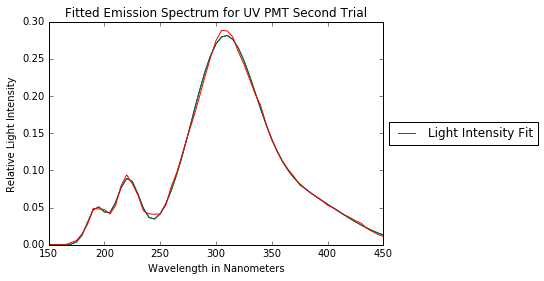

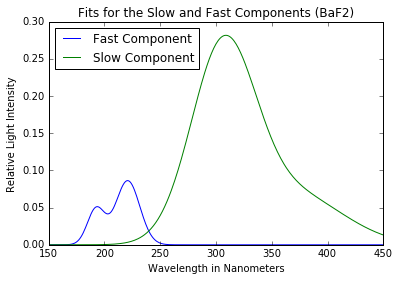

(0.11286243062670365, 0.8871375693732964)


In [40]:
# This outputs the convolution and the fit. The final result is the percentage of the slow and fast component. 

#BaF2_spectrum()

#guess = [.1646, 192.3, 12.06, .3017, 221.4, 14.86, .9184, 304.6, 42.27, .2215, 376.5, 61.72]
#fit1 = optimize(gauss_BaF2, guess)
#linefitgauss4(fit1, wl_BaF2, 'Fitted Emission Spectrum for BaF2', 'Wavelength in Nanometers',\
#                 'Relative Light Intensity', 'Light Intensity Fit')

y_final = convolve2()
#plt.plot(wl_BaF2, y_final)
#plt.show()

para = [.04, 190, 10, .1, 221, 14.8, .3, 305, 42.27, .08, 390, 61]
fit2 = optimize(gauss_PMT, para)
linefitgauss4(fit2, wl_BaF2, 'Fitted Emission Spectrum for UV PMT Second Trial',\
              'Wavelength in Nanometers', 'Relative Light Intensity', 'Light Intensity Fit')
values = list(fit2.x)
#values = [4.81878721e-02, 1.92595247e+02, 7.78265493e+00, 8.62458430e-02, 2.20879193e+02, 1.07785755e+01, 2.53039186e-01, 3.06118184e+02, 2.86227125e+01, 6.88847019e-02, 3.67604375e+02, 4.52877055e+01]

slow_fast(fit2)
comp_perc(comp_fast, comp_slow)
          